In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
import nltk 
from nltk.corpus import stopwords # needs to typed in same syntax


# Importing Yelp CSV File

In [12]:
yelp= pd.read_csv('yelp.csv')

In [13]:
yelp.describe()

,stars,cool,useful,funny
count,1499.000000,1499.000000,1499.000000,1499.000000
mean,3.769847,0.965310,1.511007,0.805871
std,1.241149,2.152745,2.456643,2.303783
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,28.000000,28.000000,39.000000


In [14]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 10 columns):
business_id    1499 non-null object
date           1499 non-null object
review_id      1499 non-null object
stars          1499 non-null int64
text           1499 non-null object
type           1499 non-null object
user_id        1499 non-null object
cool           1499 non-null int64
useful         1499 non-null int64
funny          1499 non-null int64
dtypes: int64(4), object(6)
memory usage: 117.2+ KB


In [15]:
# we create a field called text egth which stores the number of characters in each review
yelp['Text length']= yelp['text'].apply(len)

In [16]:
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Text length
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# Exploring Data Set

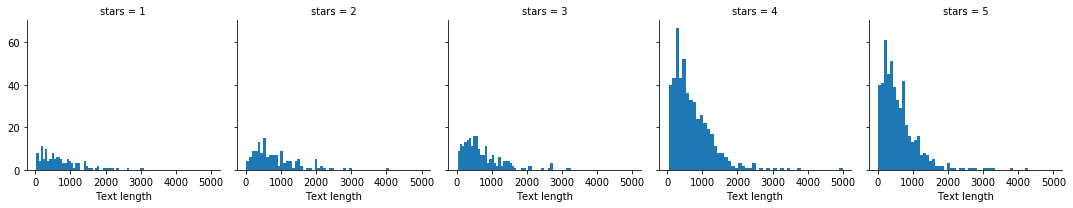

In [17]:
#will visualize the data using graphs-plotted using Seaborn
g=sns.FacetGrid(data=yelp,col='stars')
g.map(plt.hist,'Text length',bins=50) # Bins are intervals for Continuous variable i.e text_lenght in our case.


In [9]:
# From the above plots we can see that the text lenghth distribution is almost similar for all the star ratings.
#But we also see that histogram plts for stars 4 and 5 have higher skewness. 
#So lets consider if Box plots will help us analyse better.


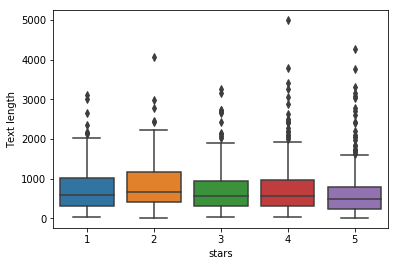

In [18]:
sns.boxplot(x='stars',y='Text length',data=yelp)
#Here we see that the text length is more for stars 1 and 2 which is a bit contradicting to the histograms.

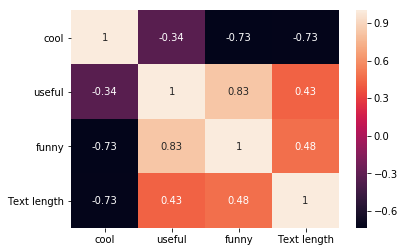

In [19]:
stars=yelp.groupby('stars').mean()
stars.corr()

sns.heatmap(data=stars.corr(),annot=True)
#Looking at the map, funny is strongly correlated with useful, and useful seems strongly correlated with text length.
#We can also see a negative correlation between cool and the other three features.

# Independent and dependent variables

In [20]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]


In [21]:
yelp_class
yelp_class.shape
#We can see from .shape that yelp_class only has 4086 reviews, compared to the 10,000 reviews in the original dataset. This is because we aren’t taking into account the reviews rated 2, 3, and 4 stars.
#Next, let’s create the X and y for our classification task. 
#X will be the text column of yelp_class, and y will be the stars column.

(636, 11)

In [22]:
X=yelp_class['text'] 
Y=yelp_class['stars']

# Text Preprocessing

In [23]:
import string

In [24]:
#nltk.download
                     # we'll see String.punctuation
string.punctuation



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
#We also see that all the text is plain text format
#lets write a function to remove punctuation and print as a word and not characters

def text_process(text):
   # s = 'Stop!,start.'
    nopunc = [char for char in text if char not in string.punctuation] # checks the alphabets against characters                                                                      #if it's not present it will pint the alphabet
    nopunc = ''.join(nopunc) # Joins the characters as words 
                                                                     #if it's not present it will pint the alphabet
    spl=nopunc.split()
    
    word_without_stop_words = []
    for word in spl:
        if word.lower() not in stopwords.words():
            word_without_stop_words.append(word)
    return word_without_stop_words        # trying to get the list from string      
               
    

In [26]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


# Vectorization

In [30]:
#from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X) # ex code : bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(messages['message'])

In [31]:
len(bow_transformer.vocabulary_)

8943

Vectorizers transform the corpus (for example text documents), into vectors Vector Space Model. There are many ways to do this, and the result will depend on the technique that is used. Vectorizers are necessary because models work with numbers, not with words. In particular, the implementation of CountVectorizer will generate an array with the number of occurrences of each word. In this particular case CountVectorizer is used as a prior step to generate a TF-IDF (Term Frequency - Inverse Document Frequency) representation, which is one of the most popular techniques for determining the "importance" of a word in a document. The assumption of this model is that the terms that appear more are more likely to represent that document (Term frequency), however, 'common words' between the whole corpus should not be taken into account (Inverse Document Frequency), for example, connectors. This technique is widely used in the information retreival field.

Once you have the corpus in a vector space representation you can start to use this representation as an input for your machine learning technique.

The transform method, in particular, will return the result of applying the trained (fit) model to the element that is passed as argument. In other words, transformations 'translate' the input into the 'model representation language'.

Let's clarify this with an example:

Assume we have 3 documents (the content does not make sense, I know):

Document 1: this is document one is grumpy.
Document 2: this is document two is sad.
Document 3: this is document three is happy.
CountVectorizer will learn the vocabulary when fit() is invoked.


[this, is, document, one, grumpy, two, sad, three, happy]

On the other side, when transform is invoked on the corpus, it will use the vocabulary to generate this matrix:


    [1, 2, 1, 1, 1, 0, 0, 0, 0]
(1) [1, 2, 1, 0, 0, 1, 1, 0, 0]
    [1, 2, 1, 0, 0, 0, 0, 1, 1]

Which contains word ocurrences for each document. Here, the value 2 corresponds to the word 'is' which is repeated twice in each document. Also, the value '0' means that the word is not present in the document.

Now, we can use this matrix to train the TF-IDF model with fit() and it will generate the following vector:


(2) [3, 6, 3, 1, 1, 1, 1, 1, 1]

Which contains the global occurrences of each word. Then, when you apply transform to (1), the tf-idf model will employ the vector generated in the fit phase (2) to create the tf-idf matrix:


[0.33, 0.33, 0.33, 1, 1, 0, 0, 0, 0]
[0.33, 0.33, 0.33, 0, 0, 1, 1, 0, 0]
[0.33, 0.33, 0.33, 0, 0, 0, 0, 1, 1]

in which lower numbers represent more common words. Pay attention that 'unique' words have higher numbers. This later matrix is the one you will use to train your ML model.

To summarize, if for example you want to use a clustering technique (KMeans for example) for classifying a bunch of documents the process would be:

Transform the documents to generate a VSM representation. Fit a TF-IDF model that will serve the propose of identifying which terms are most important in each document.

Fit the KMeans model which will generate clusters that ideally will contain related documents. For this, the model will use the result generated in the last step to establish document relationship by identifying shared words between them.

All this explanation is in the context of natural language processing, if you want to use ML for identifying images of course you won't use tf-idf.

In [41]:
# With the above knowledge,
review_25 = X[24]
review_25
print(bow_transformer.transform([review_25]))



  (0, 565)	1
  (0, 796)	1
  (0, 2438)	1
  (0, 2530)	1
  (0, 2587)	1
  (0, 2702)	1
  (0, 2745)	1
  (0, 3182)	1
  (0, 3435)	3
  (0, 3451)	1
  (0, 3588)	1
  (0, 3717)	1
  (0, 4140)	1
  (0, 4208)	1
  (0, 4569)	1
  (0, 4838)	1
  (0, 5288)	1
  (0, 5774)	1
  (0, 5830)	1
  (0, 6589)	1
  (0, 6684)	1
  (0, 7365)	3
  (0, 8360)	1
  (0, 8823)	1


In [44]:
print(bow_transformer.get_feature_names()[3435])
print(bow_transformer.get_feature_names()[7365])
#This means that there are 24 unique words in the review (after removing stopwords). 
#Two of them appear thrice, and the rest appear only once.

chicken
sandwich


In [45]:
# we checked that this working fine, so lets convert the entire data to sparse matrix
X=bow_transformer.transform(X) # remember : X=yelp_class['text'] as we have coded above
#bow_transformer is the transformer object for bag_of_words approach 

# Also see the difference between Fit_transform() and transform()

In [47]:
print(X.shape) # shape of X after transform
               #i.e X[0]=636 AND X[1]=8943
                    

(636, 8943)


In [48]:
print(X.nnz)   #no of non xero occurences

33304


In [50]:
#lets calculate density percentage for non zero occurence : 636*8943 is total size of data set
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Density: 0.5855393030774219


# Training and Test Data

In [54]:
#Multinomial Naive Bayes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

#X:training and test data for all independant features while
#Y: indiactes text and train data for dependant variable
# ** https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d

# Training the model

In [56]:
#invoking Multinomial Naive Bayes and fitting train and test data 
from sklearn.naive_bayes import MultinomialNB

In [57]:
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Testing and Evaluating the model

In [69]:
 # Storing Test data i.e predictions to another data frame
predicts = nb.predict(X_test)
predicts

array([5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 1, 5, 5, 5,
       1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5,
       5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [65]:
#https://machinelearningmastery.com/confusion-matrix-machine-learning/
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predicts))
print('\n')
print(classification_report(y_test, predicts))

[[ 16  28]
 [  6 141]]


             precision    recall  f1-score   support

          1       0.73      0.36      0.48        44
          5       0.83      0.96      0.89       147

avg / total       0.81      0.82      0.80       191



In [66]:
positive_review = yelp_class['text'][59]
positive_review

"This restaurant is incredible, and has the best pasta carbonara and the best tiramisu I've had in my life. All the food is wonderful, though. The calamari is not fried. The bread served with dinner comes right out of the oven, and the tomatoes are the freshest I've tasted outside of my mom's own garden. This is great attention to detail.\n\nI can no longer eat at any other Italian restaurant without feeling slighted. This is the first place I want take out-of-town visitors I'm looking to impress.\n\nThe owner, Jon, is helpful, friendly, and really cares about providing a positive dining experience. He's spot on with his wine recommendations, and he organizes wine tasting events which you can find out about by joining the mailing list or Facebook page."

In [68]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

5

# The model thinks this review is positive, just as we expected.

In [ ]:
# ALhough the modelis working fine, if we check this for other values, we will notice that the model 
#is more tending towards the false positives with 81% accuracy on scaled data set. 